# Telecom Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import churn_data dataset

churn_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Import sutomer customer_data

cust_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\customer_data.csv")
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# Import internet_data

int_data = pd.read_csv("C:\\Users\\exsxaxr\\Downloads\\internet_data.csv")
int_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Merging all dataset based on cutomer ID

df = pd.merge(churn_data, cust_data, how='inner', on='customerID')
final_df = pd.merge(df, int_data, how='inner', on='customerID')

In [6]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
final_df.shape

(7043, 21)

In [9]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


In [10]:
# Checking null values

final_df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

## EDA

In [11]:
# There are some blank values in TotalCharges column.

final_df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
final_df['TotalCharges'] = final_df['TotalCharges'].replace(' ', np.nan)

In [13]:
final_df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [14]:
# Changing the dtype to numeric

final_df['TotalCharges'] = pd.to_numeric(final_df['TotalCharges'])

In [15]:
final_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
final_df.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

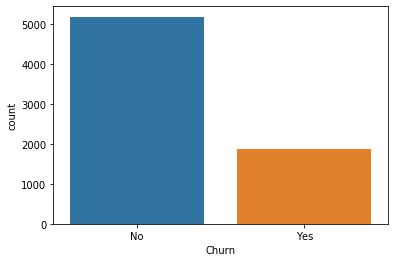

In [17]:
sns.countplot(final_df['Churn'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F586355A08>],
      dtype=object)

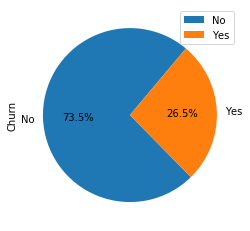

In [18]:
pie_churn = pd.DataFrame(final_df.Churn.value_counts())
pie_churn.plot.pie(subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', startangle=50)

In [19]:
# We have a churn rate of 26.5%

In [20]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [21]:
final_df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

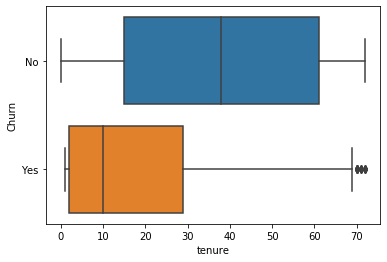

In [22]:
# Finding the time for which a customer is using the service

sns.boxplot(x='tenure', y='Churn', data=final_df)

In [23]:
# Cutomer with more tenure churns less

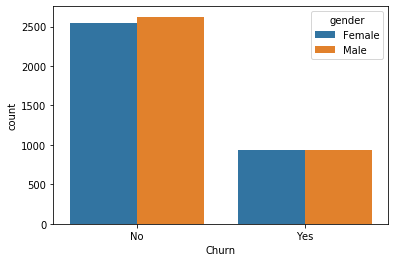

In [24]:
# Find churn rate based on gender

sns.countplot(df['Churn'], hue=df['gender'])

In [25]:
# Looks like there is no relation between churn rate and gender

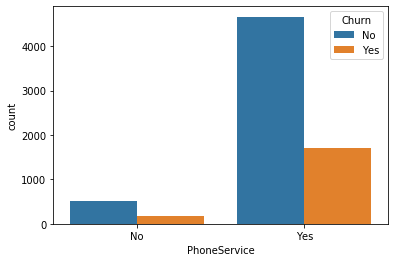

In [26]:
sns.countplot(final_df['PhoneService'], hue=final_df['Churn'])

Text(0.5, 1.0, 'Churn Rate for customers \n opted for Phone Service')

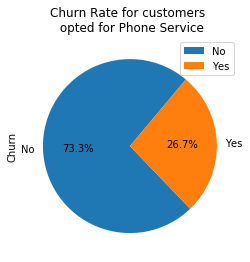

In [27]:
# Churn rate of customers who opted for phone service

pie_phone_service = pd.DataFrame(final_df[final_df['PhoneService']=='Yes']['Churn'].value_counts())
pie_phone_service.plot.pie(subplots=True, labels = pie_phone_service.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')

Text(0.5, 1.0, 'Churn Rate for customers \n that did not opt for Phone Service')

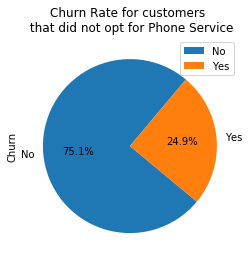

In [28]:
# Churn rate of customers who didn't opt for phone service

pie_no_phone_service = pd.DataFrame(final_df[final_df['PhoneService']=='No']['Churn'].value_counts())
pie_no_phone_service.plot.pie(subplots=True, labels = pie_no_phone_service.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n that did not opt for Phone Service')

In [29]:
# Phone service is not having a big impact in churn rate

In [30]:
# Find churn rate vs Contract relationship

final_df['Contract'].describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

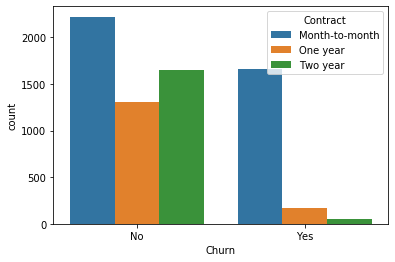

In [31]:
sns.countplot(final_df['Churn'], hue=final_df['Contract'])

Text(0.5, 1.0, 'Month-to-Month contract Churn rate')

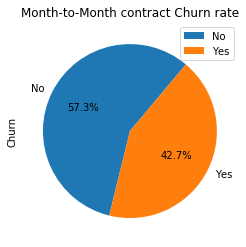

In [32]:
pie_month_contract = pd.DataFrame(final_df[final_df['Contract']=='Month-to-month']['Churn'].value_counts())
pie_month_contract.plot.pie(subplots=True, labels = pie_month_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Month-to-Month contract Churn rate')

Text(0.5, 1.0, 'Churn rate of customers with one year contract')

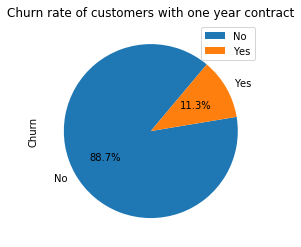

In [33]:
pie_oneyear_contract = pd.DataFrame(final_df[final_df['Contract']=='One year']['Churn'].value_counts())
pie_oneyear_contract.plot.pie(subplots=True, labels = pie_oneyear_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn rate of customers with one year contract')

Text(0.5, 1.0, 'Churn rate of customers with one year contract')

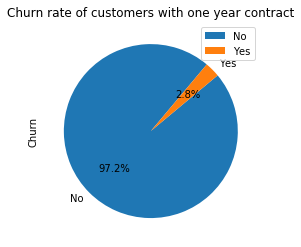

In [34]:
pie_twoyear_contract = pd.DataFrame(final_df[final_df['Contract']=='Two year']['Churn'].value_counts())
pie_twoyear_contract.plot.pie(subplots=True, labels = pie_oneyear_contract.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn rate of customers with one year contract')

In [35]:
# Customers with month to month contract are more likely to churn

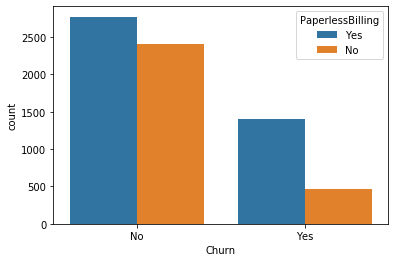

In [36]:
#Paperless Billing vs Churn rate

sns.countplot(final_df['Churn'], hue=final_df['PaperlessBilling'])

Text(0.5, 1.0, 'Churn rate of customers who \n opted for Paperless Billing')

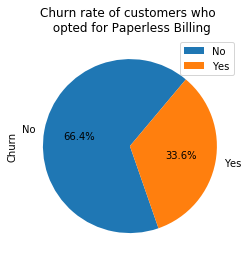

In [37]:
pie_paperless_yes = pd.DataFrame(final_df[final_df['PaperlessBilling']=='Yes']['Churn'].value_counts())
pie_paperless_yes.plot.pie(subplots=True, labels = pie_paperless_yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn rate of customers who \n opted for Paperless Billing')

Text(0.5, 1.0, 'Churn rate of customers who \n did not opt for Paperless Billing')

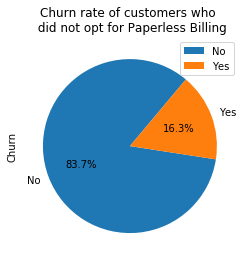

In [38]:
pie_paperless_no = pd.DataFrame(final_df[final_df['PaperlessBilling']=='No']['Churn'].value_counts())
pie_paperless_no.plot.pie(subplots=True, labels = pie_paperless_no.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn rate of customers who \n did not opt for Paperless Billing')

In [39]:
# Churn rate is more for people who opted for paperless billing

In [40]:
final_df['PaymentMethod'].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

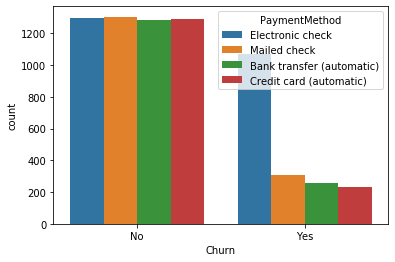

In [41]:
sns.countplot(final_df['Churn'], hue=final_df['PaymentMethod'])

In [42]:
# Customers with Electronic Check tends to churn more than other payment methods.

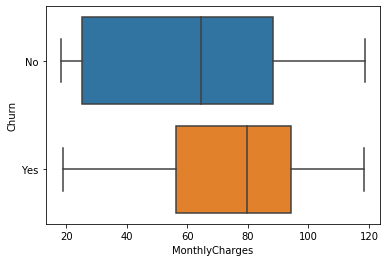

In [43]:
# Monthly Charges

sns.boxplot(x = final_df['MonthlyCharges'], y=final_df['Churn'])

In [44]:
# Median mothly charges are higher for churned customers

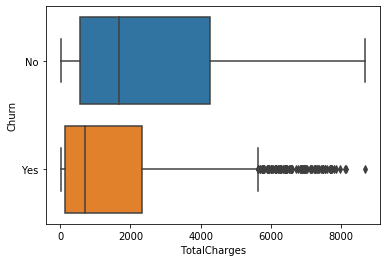

In [45]:
# Total Charges

sns.boxplot(x = final_df['TotalCharges'], y=final_df['Churn'])

In [46]:
# Median total charges are low for customers whi have churned

Text(0.5, 1.0, 'Senior Citizen Churn rate')

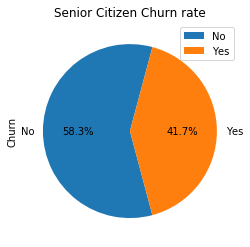

In [47]:
# Senior citizens

pie_senior = pd.DataFrame(final_df[final_df['SeniorCitizen']==1]['Churn'].value_counts())
pie_senior.plot.pie(subplots=True, labels = pie_senior.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen Churn rate')

Text(0.5, 1.0, 'Non Senior Citizen Churn rate')

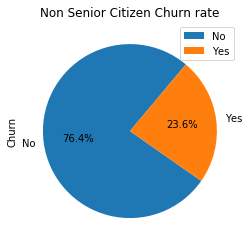

In [48]:
# Non Senior citizens

pie_no_senior = pd.DataFrame(final_df[final_df['SeniorCitizen']==0]['Churn'].value_counts())
pie_no_senior.plot.pie(subplots=True, labels = pie_senior.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Non Senior Citizen Churn rate')

In [49]:
# Churn rate is more for senior citizens

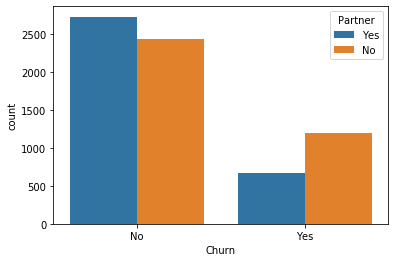

In [50]:
# Partner

sns.countplot(final_df['Churn'], hue=final_df['Partner'])

In [51]:
# Single customers are more likely to churn than married customers

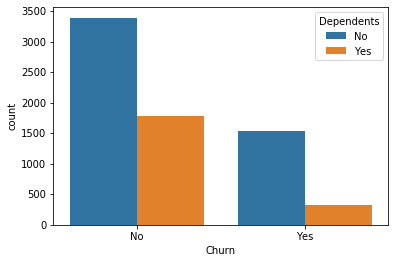

In [52]:
# Depnedents

sns.countplot(final_df['Churn'], hue=final_df['Dependents'])

In [53]:
# Customers without dependants tends to churn more

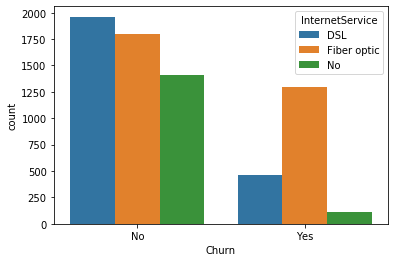

In [54]:
# Internet Service

sns.countplot(final_df['Churn'], hue=final_df['InternetService'])

In [55]:
# Customers with Fiberoptic connection tends to churn more

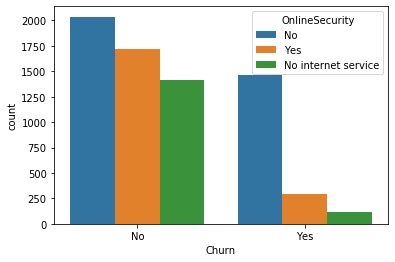

In [56]:
# Online security

sns.countplot(final_df['Churn'], hue=final_df['OnlineSecurity'])

In [57]:
# Customers with no online securty opts to churn more

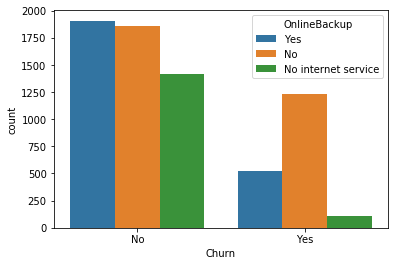

In [58]:
# Online Backup

sns.countplot(final_df['Churn'], hue=final_df['OnlineBackup'])

In [59]:
# Customers with no online backup tends to churn more

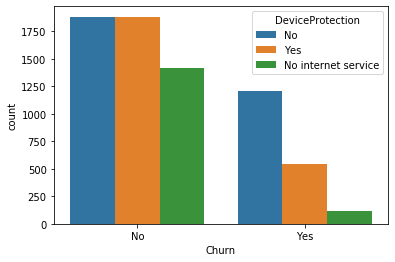

In [60]:
# Device Protection

sns.countplot(final_df['Churn'], hue=final_df['DeviceProtection'])

In [61]:
# Customers with no device protection tends to churn more

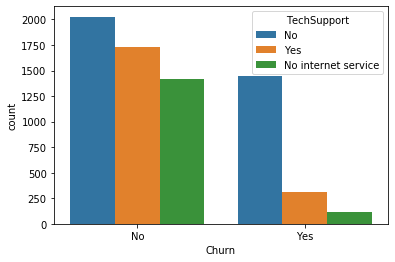

In [62]:
# Tech support

sns.countplot(final_df['Churn'], hue=final_df['TechSupport'])

In [63]:
# Customers with no tech support tends to churn more

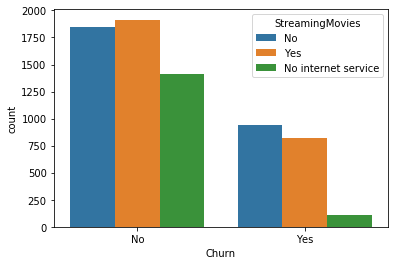

In [64]:
# Streaming Movies

sns.countplot(final_df['Churn'], hue=final_df['StreamingMovies'])

In [65]:
# STreaming movies is not having any impact on customer churn

## Model Building

In [66]:
# Convert binary values(yes/no) into numeric

In [67]:
binary_list=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
final_df[binary_list] = pd.get_dummies(binary_list)

In [68]:
final_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0.0,Month-to-month,0.0,Electronic check,29.85,29.85,0.0,Female,...,0.0,1.0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,0.0,One year,0.0,Mailed check,56.95,1889.50,1.0,Male,...,0.0,0.0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1.0,Month-to-month,0.0,Mailed check,53.85,108.15,0.0,Male,...,0.0,0.0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,Male,...,1.0,0.0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,0.0,Female,...,0.0,0.0,No,Fiber optic,No,No,No,No,No,No
